In [1]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 82s 0us/step


(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape


(50000, 1)

In [8]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [9]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
X_test[:5]

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [11]:

Names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
Names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [13]:
Names[:6]

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog']

In [37]:
def plots(x,y,ind):
    plt.figure(figsize=(5,1))
    plt.imshow(x[ind])
    plt.xlabel(Names[y[ind]])

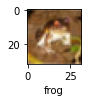

In [38]:
plots(X_train,y_train,0)

In [43]:
#normalise the data
X_train=X_train/255
X_test=X_test/255

In [45]:
#CNN model
# Conv2d+Relu->Maxpooling ->Conv2D+relu->Maxpooling-> Neural network
cnn=models.Sequential([
    #first conv2d+pooling
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #second
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #neural network
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
    
])

In [47]:
cnn.compile(
optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.6870 - accuracy: 0.3866
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1530 - accuracy: 0.5941
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9821 - accuracy: 0.6576
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8924 - accuracy: 0.6903
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8216 - accuracy: 0.7120
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7532 - accuracy: 0.7389
Epoch 7/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.6995 - accuracy: 0.7570
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6600 - accuracy: 0.7704
Epoch 9/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6154 - accuracy: 0.7853
Epoch 10/10
1563/1563 [==============================] - 43s 27m

In [50]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9265 - accuracy: 0.7042


[0.9265029430389404, 0.704200029373169]

In [51]:
ypred=cnn.predict(X_test)
ypred[:5]

array([[5.7231489e-05, 3.0014163e-04, 1.1337959e-03, 8.4655863e-01,
        7.8623014e-04, 8.8803187e-02, 3.1873640e-02, 7.0261529e-05,
        3.0386873e-02, 2.9978133e-05],
       [4.4310614e-03, 1.9726051e-01, 4.8742322e-07, 1.2926015e-09,
        5.2100977e-09, 1.4948028e-10, 2.5175112e-10, 8.0420230e-09,
        7.9781938e-01, 4.8861076e-04],
       [3.4557950e-02, 7.8201848e-01, 2.1467085e-03, 2.6827436e-03,
        7.6344272e-04, 2.9949295e-05, 7.3757335e-05, 3.7518237e-04,
        1.6449462e-01, 1.2857143e-02],
       [9.0670717e-01, 3.1039000e-02, 3.4225346e-03, 3.3975000e-04,
        2.3156137e-04, 5.1452926e-06, 7.2719381e-06, 1.6069160e-05,
        5.8154698e-02, 7.6846285e-05],
       [2.3878727e-08, 1.9573002e-07, 3.4144749e-03, 1.1451994e-03,
        9.5629996e-01, 3.9044982e-05, 3.9096799e-02, 2.0738680e-08,
        4.2855440e-06, 1.0340893e-08]], dtype=float32)

In [52]:
yclass=[np.argmax(e) for e in ypred]
yclass[:5]

[3, 8, 1, 0, 4]

In [55]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

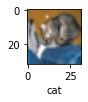

In [56]:
plots(X_test,y_test,0)

In [57]:
Names[yclass[0]]

'cat'

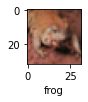

In [58]:
plots(X_test,y_test,5)


In [59]:
Names[yclass[5]]

'frog'

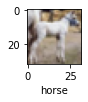

In [61]:
plots(X_test,y_test,6870)

In [62]:
Names[yclass[6870]]

'horse'

In [63]:
import pickle

In [69]:
Pkl_Filename = "./cnn_image_classification.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump([X_train,y_train], file)


In [70]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

[array([[[[0.23137255, 0.24313725, 0.24705882],
          [0.16862745, 0.18039216, 0.17647059],
          [0.19607843, 0.18823529, 0.16862745],
          ...,
          [0.61960784, 0.51764706, 0.42352941],
          [0.59607843, 0.49019608, 0.4       ],
          [0.58039216, 0.48627451, 0.40392157]],
 
         [[0.0627451 , 0.07843137, 0.07843137],
          [0.        , 0.        , 0.        ],
          [0.07058824, 0.03137255, 0.        ],
          ...,
          [0.48235294, 0.34509804, 0.21568627],
          [0.46666667, 0.3254902 , 0.19607843],
          [0.47843137, 0.34117647, 0.22352941]],
 
         [[0.09803922, 0.09411765, 0.08235294],
          [0.0627451 , 0.02745098, 0.        ],
          [0.19215686, 0.10588235, 0.03137255],
          ...,
          [0.4627451 , 0.32941176, 0.19607843],
          [0.47058824, 0.32941176, 0.19607843],
          [0.42745098, 0.28627451, 0.16470588]],
 
         ...,
 
         [[0.81568627, 0.66666667, 0.37647059],
          [0.78823